In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime as dt
from datetime import datetime
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\books.csv",on_bad_lines="skip")

In [3]:
df.columns=df.columns.str.strip()

In [4]:
df["publication_date"]=pd.to_datetime(df["publication_date"],errors="coerce",format="%m/%d/%Y")

In [5]:
df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic


# find the share of languages

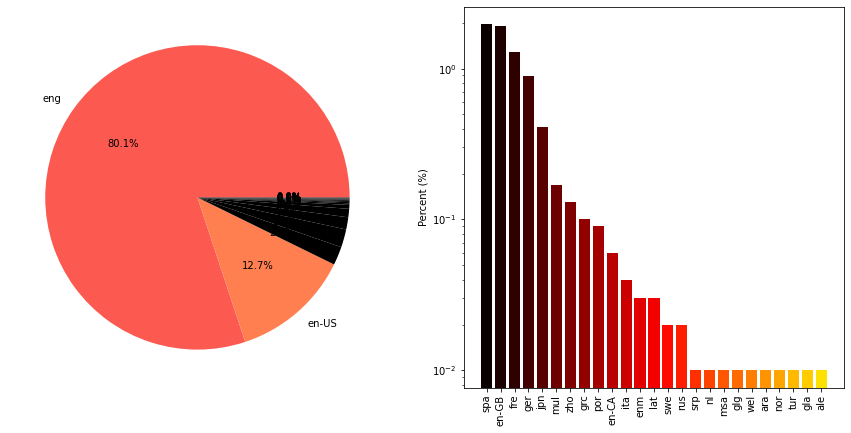

In [29]:
grouped=(df.language_code.value_counts(normalize=True)*100).round(2).reset_index()
fig,axes=plt.subplots(1,2,figsize=(15,7))
cmap=plt.get_cmap("hot")
colors1=list(cmap(np.linspace(0,0.7,grouped["index"].nunique()-2)))
colors2=list(cmap(np.linspace(1,0.5,grouped["index"].nunique())))
axes[0].pie(grouped.language_code,autopct="%.1f%%", labels=[i if i=="eng" or i=="en-US" else None for i in grouped["index"]],colors=["#FC5A50" if i=="eng" else "#FF7F50" if i=="en-US" else "k" for i in grouped["index"]])
axes[1].bar(grouped["index"][2:],grouped.language_code[2:],color=colors1)
plt.xticks(grouped["index"][2:],rotation=90)
plt.ylabel("Percent (%)")
plt.yscale("log")
plt.show()

# find the distribution of average ratings

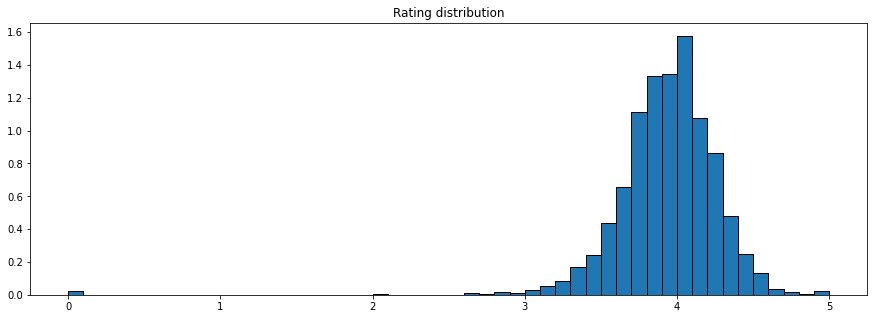

In [7]:
plt.figure(figsize=(15,5))
plt.hist(df.average_rating,density=True,bins=50,ec="k")
plt.title("Rating distribution")
plt.show()

# find top rated books' authors with 7 or more books

In [8]:
filtered=df.groupby("authors").filter(lambda x:x["authors"].count()>=7)
filtered.groupby("authors")["average_rating"].mean().reset_index().sort_values("average_rating",ascending=False)

,authors,average_rating
16,Bill Watterson,4.708571
73,Hiromu Arakawa/Akira Watanabe,4.565833
74,Hiromu Arakawa/荒川弘/方郁仁,4.556250
81,J.K. Rowling,4.513636
72,Hirohiko Araki/Hirohiko Araki,4.400000
...,...,...
227,Zadie Smith,3.536250
143,Martin Amis,3.536000
45,Don DeLillo,3.506429
105,John Brunner,3.502500


# Find months with the most published books

In [43]:
df["year"]=df.publication_date.dt.year
df["month"]=df.publication_date.dt.month_name()
df.groupby(["year","month"])["title"].count().reset_index().sort_values("title",ascending=False).head(10)

,year,month,title
503,2006.0,October,243
504,2006.0,September,216
502,2006.0,November,163
501,2006.0,May,158
494,2006.0,August,147
491,2005.0,October,142
492,2005.0,September,137
489,2005.0,May,128
493,2006.0,April,128
509,2007.0,January,126


In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\netflix_titles.csv")

In [6]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# find the share of Movies and TV Shows

In [7]:
(df.type.value_counts(normalize=True)*100).round(1)

Movie      69.6
TV Show    30.4
Name: type, dtype: float64

In [8]:
(df[df.rating.str.contains("min",na=False)==False]["rating"].value_counts(normalize=True)*100).round(1)

TV-MA       36.4
TV-14       24.5
TV-PG        9.8
R            9.1
PG-13        5.6
TV-Y7        3.8
TV-Y         3.5
PG           3.3
TV-G         2.5
NR           0.9
G            0.5
TV-Y7-FV     0.1
NC-17        0.0
UR           0.0
Name: rating, dtype: float64

In [9]:
df["date_added"]=pd.to_datetime(df["date_added"])

# Find TV Shows with 10 or more seasons

In [143]:
tv=df[df.type=="TV Show"]
tv[tv.apply(lambda x:int(x["duration"].split(" ")[0])>9,axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
390,s391,TV Show,The Walking Dead,NaN,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,2021-07-26,2019,TV-MA,10 Seasons,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ..."
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
1354,s1355,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...
1622,s1623,TV Show,Stargate SG-1,NaN,"Richard Dean Anderson, Michael Shanks, Amanda ...","United States, Canada",2020-12-01,2006,TV-MA,10 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S...",Stargate Command roars into action when Jack O...
1759,s1760,TV Show,LEGO Ninjago: Masters of Spinjitzu,NaN,"Vincent Tong, Jillian Michaels, Ian James Corl...","Denmark, Singapore, Canada, United States",2020-11-01,2019,TV-Y7,10 Seasons,Kids' TV,"Kai, Jay, Cole and Zane must master their elem..."
2203,s2204,TV Show,Shameless (U.S.),NaN,"William H. Macy, Emmy Rossum, Justin Chatwin, ...",United States,2020-07-26,2019,TV-MA,10 Seasons,"TV Comedies, TV Dramas",This dramedy based on a British series centers...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4220,s4221,TV Show,COMEDIANS of the world,NaN,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13 Seasons,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
4798,s4799,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
4964,s4965,TV Show,Trailer Park Boys,NaN,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-30,2018,TV-MA,12 Seasons,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...


# Find 5 movies with the longest duration

In [138]:
movie=df[df.type=="Movie"]
movie["duration"]=movie.duration.str.split(" ").str[0].astype(float)
movie[["title","duration"]].sort_values("duration",ascending=False).head(5)

,title,duration
4253,Black Mirror: Bandersnatch,312.0
717,Headspace: Unwind Your Mind,273.0
2491,The School of Mischief,253.0
2487,No Longer kids,237.0
2484,Lock Your Girls In,233.0


# How many percent of titles have "superhero" in description

In [12]:
df[df.description.str.contains("superhero",case=False,regex=True)].shape[0]/df.shape[0]*100

0.5336664017258999

# Find 5 actors/actresses that appear in most movies

In [50]:
grouped=df["cast"].str.split(", ",expand=True).stack().value_counts()
grouped.head(5)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
dtype: int64

# Find 20 directors with the most movies directed

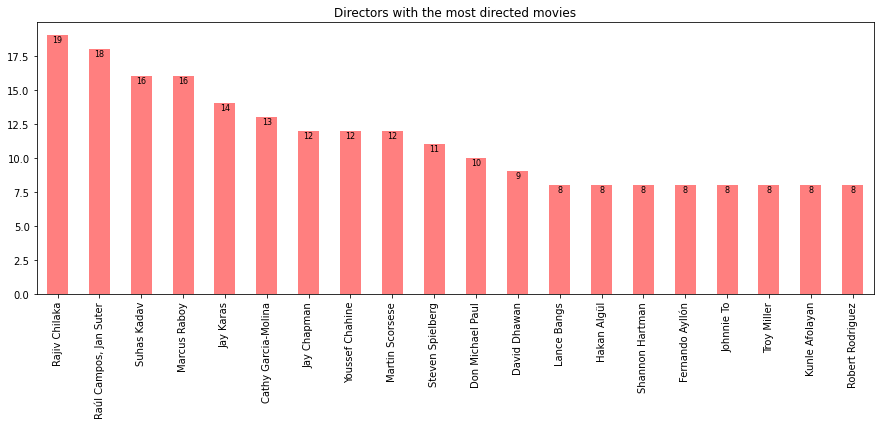

In [63]:
grouped=df.groupby("director")["title"].count().reset_index().sort_values("title",ascending=False).head(20)
grouped.plot(kind="bar",x="director",y="title",title="Directors with the most directed movies",xlabel="",legend=False,figsize=(15,5),color="r",alpha=.5)
def value_labels(y):
    for i in range(len(y)):
        plt.text(i,y.iloc[i],y.iloc[i],ha="center",va="top",size=8)
value_labels(grouped.title)
plt.show()

# Find 10 countries which appear in shooting locations most often

In [87]:
grouped=df.country.str.split(", ",expand=True).stack().value_counts()
grouped.head(10)

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

# Find 10 most popular category 

In [134]:
grouped=df.listed_in.str.split(", ",expand=True).stack().value_counts().reset_index().head(10)
grouped.columns=["category","count"]
grouped

,category,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616
